# Tutorial 1: VANs methods

In this tutorial we will train VANs to find a quantum circuit that prepares the ground state of a TFIM, by departing from a separable circuit.

In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow_quantum as tfq
import matplotlib.pyplot as plt
import cirq
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
os.chdir("..")
print("USING TFQ {} VERSION ".format(tfq.__version__))
print("USING CIRQ {} VERSION ".format(cirq.__version__))

USING TFQ 0.4.0 VERSION 
USING CIRQ 0.9.1 VERSION 


As in the previous tutorial, we will work with the TFIM

$H=-J\sum_{j=1}^n \sigma_j^x\sigma_{j+1}^x-g\sum_{j=1}^n \sigma_j^x\,,$

In [2]:
from utilities.circuit_basics import Basic, overlap
from utilities.variational import VQE 
from utilities.evaluator import Evaluator
from utilities.idinserter import IdInserter
from utilities.simplifier import Simplifier
from utilities.unitary_killer import UnitaryMurder

problem_config={"problem":"TFIM", "J":1.0, "g":1.0}

vqe_handler = VQE(n_qubits=4, epochs=2000, 
                  verbose=1,problem_config=problem_config,
                  optimizer="adam", lr=0.01)

Let us begin with a separable circuit:

In [3]:
indexed_circuit = [vqe_handler.number_of_cnots+vqe_handler.n_qubits+k for k in range(vqe_handler.n_qubits)]
display(vqe_handler.give_circuit(indexed_circuit)[0])

vqe_handler = VQE(n_qubits=4, epochs=5000, 
                  verbose=1,problem_config=problem_config,
                  optimizer="adam", lr=1e-2, patience=100)

energy, resolver, training_history = vqe_handler.vqe(indexed_circuit)

(0, 0): ───Rx(th_0)───

(0, 1): ───Rx(th_1)───

(0, 2): ───Rx(th_2)───

(0, 3): ───Rx(th_3)───

Epoch 1/5000
1/1 [==============================] - 0s 818us/step - energy: 0.5804 - lr: 0.0100 - grad_norm: 2.3142
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - energy: 0.5510 - lr: 0.0100 - grad_norm: 2.3170
Epoch 3/5000
1/1 [==============================] - 0s 1ms/step - energy: 0.5215 - lr: 0.0100 - grad_norm: 2.3202
Epoch 4/5000
1/1 [==============================] - 0s 1ms/step - energy: 0.4919 - lr: 0.0100 - grad_norm: 2.3231
Epoch 5/5000
1/1 [==============================] - 0s 1ms/step - energy: 0.4623 - lr: 0.0100 - grad_norm: 2.3257
Epoch 6/5000
1/1 [==============================] - 0s 1ms/step - energy: 0.4326 - lr: 0.0100 - grad_norm: 2.3283
Epoch 7/5000
1/1 [==============================] - 0s 884us/step - energy: 0.4029 - lr: 0.0100 - grad_norm: 2.3308
Epoch 8/5000
1/1 [==============================] - 0s 1ms/step - energy: 0.3732 - lr: 0.0100 - grad_norm: 2.3332
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - energy: 0.3434 - l

1/1 [==============================] - 0s 2ms/step - energy: -1.5073 - lr: 0.0100 - grad_norm: 2.3300
Epoch 72/5000
1/1 [==============================] - 0s 1ms/step - energy: -1.5357 - lr: 0.0100 - grad_norm: 2.3251
Epoch 73/5000
1/1 [==============================] - 0s 1ms/step - energy: -1.5640 - lr: 0.0100 - grad_norm: 2.3199
Epoch 74/5000
1/1 [==============================] - 0s 2ms/step - energy: -1.5923 - lr: 0.0100 - grad_norm: 2.3144
Epoch 75/5000
1/1 [==============================] - 0s 3ms/step - energy: -1.6204 - lr: 0.0100 - grad_norm: 2.3087
Epoch 76/5000
1/1 [==============================] - 0s 1ms/step - energy: -1.6484 - lr: 0.0100 - grad_norm: 2.3026
Epoch 77/5000
1/1 [==============================] - 0s 931us/step - energy: -1.6763 - lr: 0.0100 - grad_norm: 2.2963
Epoch 78/5000
1/1 [==============================] - 0s 1ms/step - energy: -1.7042 - lr: 0.0100 - grad_norm: 2.2899
Epoch 79/5000
1/1 [==============================] - 0s 1ms/step - energy: -1.7319 -

1/1 [==============================] - 0s 3ms/step - energy: -3.1181 - lr: 0.0100 - grad_norm: 1.3733
Epoch 141/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.1348 - lr: 0.0100 - grad_norm: 1.3540
Epoch 142/5000
1/1 [==============================] - 0s 789us/step - energy: -3.1512 - lr: 0.0100 - grad_norm: 1.3345
Epoch 143/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.1674 - lr: 0.0100 - grad_norm: 1.3158
Epoch 144/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.1834 - lr: 0.0100 - grad_norm: 1.2963
Epoch 145/5000
1/1 [==============================] - 0s 937us/step - energy: -3.1992 - lr: 0.0100 - grad_norm: 1.2773
Epoch 146/5000
1/1 [==============================] - 0s 897us/step - energy: -3.2148 - lr: 0.0100 - grad_norm: 1.2579
Epoch 147/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.2301 - lr: 0.0100 - grad_norm: 1.2386
Epoch 148/5000
1/1 [==============================] - 0s 2ms/step - energ

1/1 [==============================] - 0s 2ms/step - energy: -3.8193 - lr: 0.0100 - grad_norm: 0.3437
Epoch 210/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.8241 - lr: 0.0100 - grad_norm: 0.3350
Epoch 211/5000
1/1 [==============================] - 0s 882us/step - energy: -3.8288 - lr: 0.0100 - grad_norm: 0.3265
Epoch 212/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.8333 - lr: 0.0100 - grad_norm: 0.3182
Epoch 213/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.8378 - lr: 0.0100 - grad_norm: 0.3100
Epoch 214/5000
1/1 [==============================] - 0s 944us/step - energy: -3.8421 - lr: 0.0100 - grad_norm: 0.3021
Epoch 215/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.8464 - lr: 0.0100 - grad_norm: 0.2943
Epoch 216/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.8506 - lr: 0.0100 - grad_norm: 0.2865
Epoch 217/5000
1/1 [==============================] - 0s 1ms/step - energy:

1/1 [==============================] - 0s 975us/step - energy: -3.9775 - lr: 0.0100 - grad_norm: 0.0447
Epoch 279/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9782 - lr: 0.0100 - grad_norm: 0.0433
Epoch 280/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.9789 - lr: 0.0100 - grad_norm: 0.0418
Epoch 281/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9796 - lr: 0.0100 - grad_norm: 0.0405
Epoch 282/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.9803 - lr: 0.0100 - grad_norm: 0.0391
Epoch 283/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.9810 - lr: 0.0100 - grad_norm: 0.0378
Epoch 284/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9816 - lr: 0.0100 - grad_norm: 0.0366
Epoch 285/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.9822 - lr: 0.0100 - grad_norm: 0.0354
Epoch 286/5000
1/1 [==============================] - 0s 1ms/step - energy: -

1/1 [==============================] - 0s 1ms/step - energy: -3.9982 - lr: 0.0100 - grad_norm: 0.0036
Epoch 348/5000
1/1 [==============================] - 0s 3ms/step - energy: -3.9983 - lr: 0.0100 - grad_norm: 0.0035
Epoch 349/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9983 - lr: 0.0100 - grad_norm: 0.0034
Epoch 350/5000
1/1 [==============================] - 0s 940us/step - energy: -3.9984 - lr: 0.0100 - grad_norm: 0.0032
Epoch 351/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9985 - lr: 0.0100 - grad_norm: 0.0031
Epoch 352/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9985 - lr: 0.0100 - grad_norm: 0.0030
Epoch 353/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.9986 - lr: 0.0100 - grad_norm: 0.0029
Epoch 354/5000
1/1 [==============================] - 0s 3ms/step - energy: -3.9986 - lr: 0.0100 - grad_norm: 0.0028
Epoch 355/5000
1/1 [==============================] - 0s 2ms/step - energy: -

1/1 [==============================] - 0s 825us/step - energy: -3.9999 - lr: 0.0100 - grad_norm: 2.0063e-04
Epoch 416/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9999 - lr: 0.0100 - grad_norm: 1.9327e-04
Epoch 417/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9999 - lr: 0.0100 - grad_norm: 1.8306e-04
Epoch 418/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9999 - lr: 0.0100 - grad_norm: 1.7470e-04
Epoch 419/5000
1/1 [==============================] - 0s 3ms/step - energy: -3.9999 - lr: 0.0100 - grad_norm: 1.6732e-04
Epoch 420/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9999 - lr: 0.0100 - grad_norm: 1.5992e-04
Epoch 421/5000
1/1 [==============================] - 0s 1ms/step - energy: -3.9999 - lr: 0.0100 - grad_norm: 1.5232e-04
Epoch 422/5000
1/1 [==============================] - 0s 2ms/step - energy: -3.9999 - lr: 0.0100 - grad_norm: 1.4660e-04
Epoch 423/5000
1/1 [=========================

1/1 [==============================] - 0s 2ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 7.7111e-06
Epoch 483/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 7.3072e-06
Epoch 484/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 6.9684e-06
Epoch 485/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 6.7629e-06
Epoch 486/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 6.2382e-06
Epoch 487/5000
1/1 [==============================] - 0s 964us/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 6.0342e-06
Epoch 488/5000
1/1 [==============================] - 0s 2ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 5.6984e-06
Epoch 489/5000
1/1 [==============================] - 0s 2ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 5.3120e-06
Epoch 490/5000
1/1 [=========================

1/1 [==============================] - 0s 2ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 1.9371e-07
Epoch 550/5000
1/1 [==============================] - 0s 2ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 1.6980e-07
Epoch 551/5000
1/1 [==============================] - 0s 2ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 1.8252e-07
Epoch 552/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 1.9069e-07
Epoch 553/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 1.3006e-07
Epoch 554/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 1.0911e-07
Epoch 555/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 1.1522e-07
Epoch 556/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 1.2388e-07
Epoch 557/5000
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 2.6935e-09
Epoch 617/5000
1/1 [==============================] - 0s 983us/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 2.6935e-09
Epoch 618/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 2.9176e-09
Epoch 619/5000
1/1 [==============================] - 0s 1ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 5.4372e-10
Epoch 620/5000
1/1 [==============================] - 0s 2ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 5.6896e-10
Epoch 621/5000
1/1 [==============================] - 0s 2ms/step - energy: -4.0000 - lr: 0.0100 - grad_norm: 5.9030e-10


In [ ]:
dict_evaluator={"n_qubits":4,"problem_config":problem_config, "specific_name":"TFIM/{}Q - J {} g {}".format(vqe_handler.n_qubits, problem_config["J"], problem_config["g"])}

evaluator = Evaluator(dict_evaluator, path="examples_repository", acceptance_percentage=args.acceptance_percentage,
                      accuracy_to_end=accuracy_to_end, reduce_acceptance_percentage=reduce_acceptance_percentage)


In [ ]:
if evaluator.accept_energy(MSenergy):

    #delete as many 1-qubit gates as possible, as long as the energy doesn't go up (we allow %1 increments per iteration)
    indexed_circuit, symbol_to_value, index_to_symbols = Sindices, MSsymbols_to_values, Sindex_to_symbols
    cnt=0
    reduced=True
    lmax=len(indexed_circuit)
    while reduced and cnt < lmax:
        indexed_circuit, symbol_to_value, index_to_symbols, energy, reduced = killer.unitary_slaughter(indexed_circuit, symbol_to_value, index_to_symbols, reference_energy = MSenergy)
        indexed_circuit, symbol_to_value, index_to_symbols = Simp.reduce_circuit(indexed_circuit, symbol_to_value, index_to_symbols)
        cnt+=1
    print("Accepted circuit! Actually I reduced it from {} to {}. With this, energy increased {}".format(len(Sindices), len(indexed_circuit), MSenergy-energy))
    relevant=True

evaluator.add_step(indexed_circuit, symbol_to_value, energy, relevant=relevant)


Text(0, 0.5, 'Difference w/ \nground state energy')

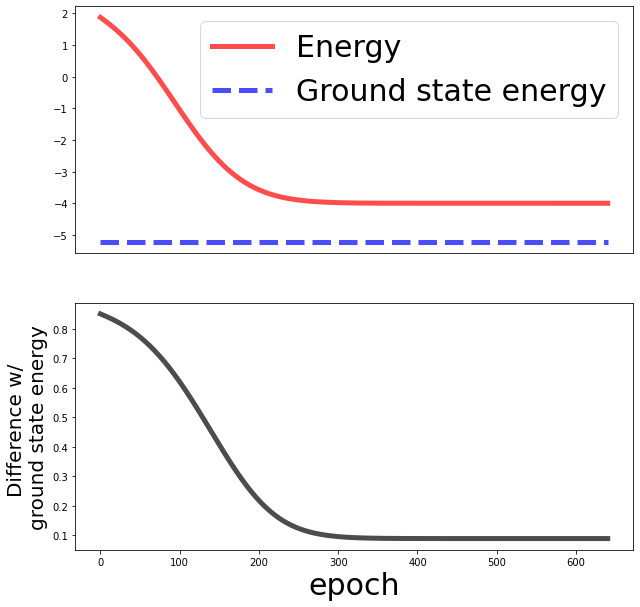

In [6]:
### Let's compute the ground-state:
H=sum(vqe_handler.observable).matrix()
eigs = np.linalg.eigh(H)
ground_state_energy = eigs[0][0]
ground_state = eigs[1][:,0]

lw=5
ls=30
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(training_history.history["energy"], linewidth=lw, alpha=0.7, color="red", label="Energy")
plt.plot(np.ones(len(training_history.history["energy"]))*ground_state_energy, '--', linewidth=lw, alpha=0.7, color="blue", label="Ground state energy")
plt.xticks([])
plt.legend(prop={"size":30})
plt.subplot(212)
plt.plot(np.log10(np.abs(training_history.history["energy"] - ground_state_energy)),  linewidth=lw, alpha=0.7, color="black")
plt.xlabel("epoch",size=ls)
plt.ylabel("Difference w/ \nground state energy",size=int(ls/1.5))


As expected, this initial circuit is not complex enough (since it prepares only separable states). 


### Identity insertion


Let us now look how VANs adds new block of gates

In [7]:
from utilities.idinserter import IdInserter
iid = IdInserter(n_qubits=vqe_handler.n_qubits, selector_temperature = 10.0)

First, we can choose the probability of appending more than one identity resolution, via the <i>rate_iids_per_step</i> option (essentially this parameter controls the temperature of an exponentially decaying distribution that rules the probability of adding N gates).

In [8]:
print("*"*100)
print("Initial circuit ")
display(vqe_handler.give_unitary(indexed_circuit,resolver))
print("\n\n")
mutations = {}
rates_iid_per_step = [0.0, 1.0, 10.0]
for ind, rate in enumerate(rates_iid_per_step):
    print("Adding identiies with rate_iid_per_step {}".format(rate))
    mutations[ind]= iid.place_identities(indexed_circuit, resolver, rate_iids_per_step=rate)
    display(vqe_handler.give_unitary(mutations[ind][0],mutations[ind][1]))
    print("\n")

****************************************************************************************************
Initial circuit 


(0, 0): ───Rx(0)────

(0, 1): ───Rx(0)────

(0, 2): ───Rx(2π)───

(0, 3): ───Rx(2π)───




Adding identiies with rate_iid_per_step 0.0


(0, 0): ───Rx(0)─────────────────────────────────────────────────────

(0, 1): ───Rx(0)────@───Rz(-0.032π)───Rx(-0.032π)───Rz(0.032π)───@───
                    │                                            │
(0, 2): ───Rx(2π)───X───Rx(-0.032π)───Rz(-0.032π)───Rx(0.032π)───X───

(0, 3): ───Rx(2π)────────────────────────────────────────────────────



Adding identiies with rate_iid_per_step 1.0


┌────────────┐
(0, 0): ───Rx(0)────────────────X───────────────────────────────X────────────Rx(0.032π)───Rz(0.032π)───Rx(0.032π)───X───Rx(0.032π)───Rz(-0.032π)───Rx(0.032π)───X────────────
                                │                               │                                                   │                                           │
(0, 1): ───Rx(0)─────Rz(-0.032π)┼────Rx(0.032π)───Rz(0.032π)────┼───────────────────────────────────────────────────┼───────────────────────────────────────────┼────────────
                                │                               │                                                   │                                           │
(0, 2): ───Rx(2π)────Rz(0.032π)─┼────Rx(0.032π)───Rz(-0.032π)───@────────────Rz(0.032π)───Rx(0.032π)───Rz(0.032π)───@───────────────────────────────────────────┼────────────
                                │                                                                                                                               │
(0, 3): ────────────────────────@────Rz(0.032π)───Rx(-0.032π)───Rz(0.032π)──────────────────────────────────────────────────────────────────────────────────────@───Rx(2π)───
                    └────────────┘



Adding identiies with rate_iid_per_step 10.0


(0, 0): ───Rx(0)────X───Rx(-0.032π)───Rz(0.032π)───Rx(-0.032π)───X───
                    │                                            │
(0, 1): ───Rx(0)────┼────────────────────────────────────────────┼───
                    │                                            │
(0, 2): ───Rx(2π)───@───Rz(-0.032π)───Rx(0.032π)───Rz(-0.032π)───@───

(0, 3): ───Rx(2π)────────────────────────────────────────────────────

Moreover, the IIdInserter "weights" how many qubits are affected by rotations/CNOTs, giving more (or less) priority to each qubit, at the moment of adding new gates. 

Let us consider an example where a circuit has more gates acting on the first two qubits. For different values of the selector_temperature, IIdInserter will spread new gates more uniformly among the circuit, or won't care about gate distribution.

<u> Comment</u>: The intuition here is that for a problem complex enough, there should at least be some gates acting at each qubit, and some correlations present between different qubits; thus this mechanism prevents the algorithm to get stucked in circuits that have no gates acting on the different subsystems

In [11]:
ind_circuit = [vqe_handler.number_of_cnots + vqe_handler.n_qubits + k for k in range(vqe_handler.n_qubits)]
more_gates = [vqe_handler.number_of_cnots + k for k in range(int(vqe_handler.n_qubits/2))]
even_more_gates = [vqe_handler.number_of_cnots + vqe_handler.n_qubits + k for k in range(int(vqe_handler.n_qubits/2))]

for k in range(3):
    for ii in more_gates:
        ind_circuit.append(ii)
    for ii in even_more_gates:
        ind_circuit.append(ii)
    for ii in [0]:
        ind_circuit.append(ii)

circuit, symbols, ind_to_symbol = vqe_handler.give_circuit(ind_circuit)
random_resolver = {s:r for s,r in zip(symbols, np.random.randn(len(symbols)))}
print("Initial circuit")
display(cirq.resolve_parameters(circuit,random_resolver))
print("\n\n")

### Note that T=0.0 will be random, thus you might run this cell many times.
for T in [0.0, 100.0]:
    print("Add single identity with selector_temperature {}".format(T))
    iid = IdInserter(n_qubits=vqe_handler.n_qubits, selector_temperature = T)
    identity_added= iid.place_identities(ind_circuit, random_resolver, rate_iids_per_step=0.0)
    display(vqe_handler.give_unitary(identity_added[0],identity_added[1]))
    print("\n \n")

Initial circuit


(0, 0): ───Rx(-0.205π)───Rz(0.077π)───Rx(0.045π)────@───Rz(0.087π)───Rx(0.257π)────@───Rz(-0.129π)───Rx(0.144π)────@───
                                                    │                              │                               │
(0, 1): ───Rx(-0.124π)───Rz(0.135π)───Rx(-0.024π)───X───Rz(0.016π)───Rx(-0.162π)───X───Rz(0.099π)────Rx(-0.399π)───X───

(0, 2): ───Rx(-0.195π)─────────────────────────────────────────────────────────────────────────────────────────────────

(0, 3): ───Rx(-0.382π)─────────────────────────────────────────────────────────────────────────────────────────────────




Add single identity with selector_temperature 0.0


┌───────────┐
(0, 0): ───Rx(-0.205π)───Rz(0.077π)───Rx(0.045π)────@───Rz(0.087π)───Rx(0.257π)────@────@──────────────Rz(0.032π)────Rx(-0.032π)───Rz(0.032π)───@───Rz(-0.129π)───Rx(0.144π)───@───
                                                    │                              │    │                                                       │                              │
(0, 1): ───Rx(-0.124π)───Rz(0.135π)───Rx(-0.024π)───X───Rz(0.016π)───Rx(-0.162π)───X────┼Rz(0.099π)────Rx(-0.399π)──────────────────────────────┼──────────────────────────────X───
                                                                                        │                                                       │
(0, 2): ───Rx(-0.195π)──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────┼──────────────────────────────────
                                                                                        │                                                       │
(0, 3): ───Rx(-0.382π)──────────────────────────────────────────────────────────────────X──────────────Rx(0.032π)────Rz(-0.032π)───Rx(0.032π)───X──────────────────────────────────
                                                                                       └───────────┘


 

Add single identity with selector_temperature 100.0


(0, 0): ───Rx(-0.205π)───Rz(0.077π)───Rx(0.045π)────@─────────────Rz(0.087π)───Rx(0.257π)────@───Rz(-0.129π)───Rx(0.144π)────@───
                                                    │                                        │                               │
(0, 1): ───Rx(-0.124π)───Rz(0.135π)───Rx(-0.024π)───X─────────────Rz(0.016π)───Rx(-0.162π)───X───Rz(0.099π)────Rx(-0.399π)───X───

(0, 2): ───Rx(-0.195π)───Rz(0.032π)───Rx(0.032π)────Rz(-0.032π)──────────────────────────────────────────────────────────────────

(0, 3): ───Rx(-0.382π)───────────────────────────────────────────────────────────────────────────────────────────────────────────

### Simplifying the circuit

The next method we review is the Simplifier. Here, the circuit is reduced to an equivalent one (i.e. energy-preserving transformations), according to specific rules (check paper for details).

Let us inspect how this works for the TFIM, on some circuit having many redundancies.

In [12]:
ind_circuit = [vqe_handler.number_of_cnots + k for k in range(vqe_handler.n_qubits)]
more_gates = [vqe_handler.number_of_cnots + vqe_handler.n_qubits + k for k in range(int(vqe_handler.n_qubits/2))]
even_more_gates = [vqe_handler.number_of_cnots + vqe_handler.n_qubits + k for k in range(int(vqe_handler.n_qubits/2))]
        
for ii in ind_circuit[:]:
    ind_circuit.append(ii)
    ind_circuit.append(ii)

for ii in more_gates:
    ind_circuit.append(ii)
    ind_circuit.append(ii)
for k in range(vqe_handler.number_of_cnots):
    ind_circuit.append(k)
    ind_circuit.append(k)

    
circuit, symbols, ind_to_symbol = vqe_handler.give_circuit(ind_circuit)
random_resolver = {s:r for s,r in zip(symbols, np.random.randn(len(symbols)))}
print("Initial redundant circuit")
display(cirq.resolve_parameters(circuit,random_resolver))
print("\n\n")



Simp = Simplifier(n_qubits=len(vqe_handler.qubits))
Sindices, Ssymbols_to_values, Sindex_to_symbols = Simp.reduce_circuit(ind_circuit, random_resolver, ind_to_symbol)


reduced_state = cirq.unitary(cirq.resolve_parameters(vqe_handler.give_circuit(Sindices)[0], Ssymbols_to_values))[:,0]
initial_state = cirq.unitary(cirq.resolve_parameters(vqe_handler.give_circuit(ind_circuit)[0], random_resolver))[:,0]


print("REDUCED CIRCUIT: \n")
Scircuit, Ssymbols, Sind_to_symbol = vqe_handler.give_circuit(Sindices)
display(cirq.resolve_parameters(Scircuit,Ssymbols_to_values))
print("\n\n")


print("INITIAL ENERGY: {}".format(overlap(initial_state,np.dot(H,initial_state))))
print("FINAL ENERGY: {}".format(overlap(reduced_state,np.dot(H,reduced_state))))



Initial redundant circuit


┌──┐   ┌──┐
(0, 0): ───Rz(-0.119π)───Rz(-0.231π)───Rz(-0.536π)───Rx(0.284π)────Rx(0.014π)────@───@───@───@───@───@───X───X─────────────X──────X────────────────────X───X───────────────────
                                                                                 │   │   │   │   │   │   │   │             │      │                    │   │
(0, 1): ───Rz(-0.418π)───Rz(-0.705π)───Rz(0.224π)────Rx(-0.169π)───Rx(-0.179π)───X───X───┼───┼───┼───┼───@───@───@───@────@┼─────@┼────X───X───────────┼───┼───X───X───────────
                                                                                         │   │   │   │           │   │    ││     ││    │   │           │   │   │   │
(0, 2): ───Rz(-0.254π)───Rz(0.375π)────Rz(-0.136π)───────────────────────────────────────X───X───┼───┼───────────X───X────┼@─────┼@────@───@───@───@───┼───┼───┼───┼───X───X───
                                                                                                 │   │                    │      │             │   │   │   │   │   │   │   │
(0, 3): ───Rz(-0.119π)───Rz(-0.198π)───Rz(0.484π)────────────────────────────────────────────────X───X────────────────────X──────X─────────────X───X───@───@───@───@───@───@───
                                                                                                                         └──┘   └──┘




REDUCED CIRCUIT: 



(0, 0): ───Rx(0.298π)────

(0, 1): ───Rx(-0.348π)───

(0, 2): ───Rx(0)─────────

(0, 3): ───Rx(0)─────────




INITIAL ENERGY: (-3.0519328224171423+0j)
FINAL ENERGY: (-3.051932822417141+0j)


### Unitary Killer

Let us now move to inspect how VANs simplify the circuit even further. Essentially, we delete gates whose presence in the circuit does not contribute to reducing the energy (too much). For example, if rotations compile to identity, they should not contribute and are likely to be removed.

The parameter acccept_wall ($\beta$) the probability $e^{-\beta \frac{\delta E}{E_i}}$ at which, if $\delta E >0$, the change is accepted (i.e. energy increases but we still admit this simplification). Feel free to play with the acceptance_wall parameter to see the effect!

In [20]:
x=np.linspace(0,.1,100)
b=10.
y = np.exp(-b*x)

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_notebook, show

output_notebook()
source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(0, 1), plot_width=400, plot_height=400,x_axis_label="Relative Energy shift", y_axis_label="Acceptance probability")
plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None
plot.line('x', 'y', source=source, line_width=5, line_alpha=0.9,color="red")

b_slider = Slider(start=0, end=1000, value=b, step=10, title='Acceptance wall')

callback = CustomJS(args=dict(source=source, b_slider=b_slider),
                    code="""
    const data = source.data;
    const B = b_slider.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.exp(-B*x[i]);
    }
    source.change.emit();
""")
b_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(b_slider),
)


show(layout)

Loading BokehJS ...

Let's implement this mechanism for the circuit we have obtained by appending an identity resolution to the separable qubit

In [27]:
indexed_circuit_1, resolver1, positions1 = mutations[1]
display(vqe_handler.give_unitary(indexed_circuit_1, resolver1))

┌────────────┐
(0, 0): ───Rx(0)────────────────X───────────────────────────────X────────────Rx(0.032π)───Rz(0.032π)───Rx(0.032π)───X───Rx(0.032π)───Rz(-0.032π)───Rx(0.032π)───X────────────
                                │                               │                                                   │                                           │
(0, 1): ───Rx(0)─────Rz(-0.032π)┼────Rx(0.032π)───Rz(0.032π)────┼───────────────────────────────────────────────────┼───────────────────────────────────────────┼────────────
                                │                               │                                                   │                                           │
(0, 2): ───Rx(2π)────Rz(0.032π)─┼────Rx(0.032π)───Rz(-0.032π)───@────────────Rz(0.032π)───Rx(0.032π)───Rz(0.032π)───@───────────────────────────────────────────┼────────────
                                │                                                                                                                               │
(0, 3): ────────────────────────@────Rz(0.032π)───Rx(-0.032π)───Rz(0.032π)──────────────────────────────────────────────────────────────────────────────────────@───Rx(2π)───
                    └────────────┘

In [28]:
energy2, resolver2, pos2 = vqe_handler.vqe(indexed_circuit_1, resolver1)

Epoch 1/10000
1/1 [==============================] - 0s 1ms/step - energy: -3.8819 - lr: 0.0100 - grad_norm: 0.9156
Epoch 2/10000
1/1 [==============================] - 0s 970us/step - energy: -3.9092 - lr: 0.0100 - grad_norm: 0.7108
Epoch 3/10000
1/1 [==============================] - 0s 2ms/step - energy: -3.9328 - lr: 0.0100 - grad_norm: 0.5308
Epoch 4/10000
1/1 [==============================] - 0s 1ms/step - energy: -3.9524 - lr: 0.0100 - grad_norm: 0.3772
Epoch 5/10000
1/1 [==============================] - 0s 1ms/step - energy: -3.9682 - lr: 0.0100 - grad_norm: 0.2513
Epoch 6/10000
1/1 [==============================] - 0s 1ms/step - energy: -3.9802 - lr: 0.0100 - grad_norm: 0.1536
Epoch 7/10000
1/1 [==============================] - 0s 1ms/step - energy: -3.9887 - lr: 0.0100 - grad_norm: 0.0833
Epoch 8/10000
1/1 [==============================] - 0s 4ms/step - energy: -3.9941 - lr: 0.0100 - grad_norm: 0.0382
Epoch 9/10000
1/1 [==============================] - 0s 1ms/step - ene

1/1 [==============================] - 0s 3ms/step - energy: -4.2805 - lr: 0.0100 - grad_norm: 0.1826
Epoch 140/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.2952 - lr: 0.0100 - grad_norm: 0.1990
Epoch 141/10000
1/1 [==============================] - 0s 847us/step - energy: -4.3107 - lr: 0.0100 - grad_norm: 0.2161
Epoch 142/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.3270 - lr: 0.0100 - grad_norm: 0.2338
Epoch 143/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.3441 - lr: 0.0100 - grad_norm: 0.2519
Epoch 144/10000
1/1 [==============================] - 0s 1ms/step - energy: -4.3621 - lr: 0.0100 - grad_norm: 0.2700
Epoch 145/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.3809 - lr: 0.0100 - grad_norm: 0.2879
Epoch 146/10000
1/1 [==============================] - 0s 991us/step - energy: -4.4003 - lr: 0.0100 - grad_norm: 0.3049
Epoch 147/10000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 1.7470e-06
Epoch 276/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 1.5749e-06
Epoch 277/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 1.4463e-06
Epoch 278/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 1.4741e-06
Epoch 279/10000
1/1 [==============================] - 0s 1ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 1.5233e-06
Epoch 280/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 1.5337e-06
Epoch 281/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 1.1029e-06
Epoch 282/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 1.0713e-06
Epoch 283/10000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 4.5199e-06
Epoch 410/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 4.0628e-06
Epoch 411/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 2.9236e-06
Epoch 412/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 1.7525e-06
Epoch 413/10000
1/1 [==============================] - 0s 1ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 6.5691e-07
Epoch 414/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 9.2418e-08
Epoch 415/10000
1/1 [==============================] - 0s 3ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 1.3418e-07
Epoch 416/10000
1/1 [==============================] - 0s 2ms/step - energy: -4.8269 - lr: 0.0100 - grad_norm: 2.0813e-07
Epoch 417/10000
1/1 [===================

First, observe that the resulting energy (of the new trained circuit) is lower than the separable circuit one!

In [42]:
print("ENERGY SEPARABLE STATE {}".format(vqe_handler.give_energy(indexed_circuit, resolver)))
print("ENERGY - 1 MUTATION    {}".format(energy2))

ENERGY SEPARABLE STATE (-3.9999999994704822+0j)
ENERGY - 1 MUTATION    -4.8268938064575195


Now let us simplify the circuit using the Unitary Killer module

In [44]:
unitary_killer = UnitaryMurder(vqe_handler, accept_wall=100)
indexed_circuit3, symbol_to_value3, index_to_symbols3, energy3, _ =  unitary_killer.unitary_slaughter(indexed_circuit_1, resolver2, pos2, reference_energy=energy2)
print("Reduced circuit: ")
display(vqe_handler.give_unitary(indexed_circuit3, symbol_to_value3))

I killed 1 unitaries, Ef - Ei: -9.5367431640625e-07
I killed 2 unitaries, Ef - Ei: -9.5367431640625e-07
I killed 3 unitaries, Ef - Ei: 0.0008206367492675781
I killed 4 unitaries, Ef - Ei: 0.004304409027099609
I killed 5 unitaries, Ef - Ei: 0.008061408996582031
I killed 6 unitaries, Ef - Ei: 0.059515953063964844
I killed 7 unitaries, Ef - Ei: 0.059515953063964844
Reduced circuit: 


┌────────────┐   ┌─────────────────────┐
(0, 0): ───Rx(-0.114π)───────────────X─────X────────────────────────Rx(-0.082π)───Rz(0.123π)────────────────X───Rx(-0.078π)───Rz(0.436π)───X───
                                     │     │                                                                │                              │
(0, 1): ───Rx(-0.236π)────Rz(0.239π)─┼─────┼─────────Rx(-0.125π)────Rz(0.322π)──────────────────────────────┼──────────────────────────────┼───
                                     │     │                                                                │                              │
(0, 2): ───Rx(1.81π)──────Rx(-0.131π)┼─────@────────────────────────Rz(0.053π)────Rx(0.076π)───Rz(0.324π)───@──────────────────────────────┼───
                                     │                                                                                                     │
(0, 3): ─────────────────────────────@─────Rx(0.291π)───────────────Rz(0.5π)───────────────────────────────────────────────────────────────@───
                         └────────────┘   └─────────────────────┘

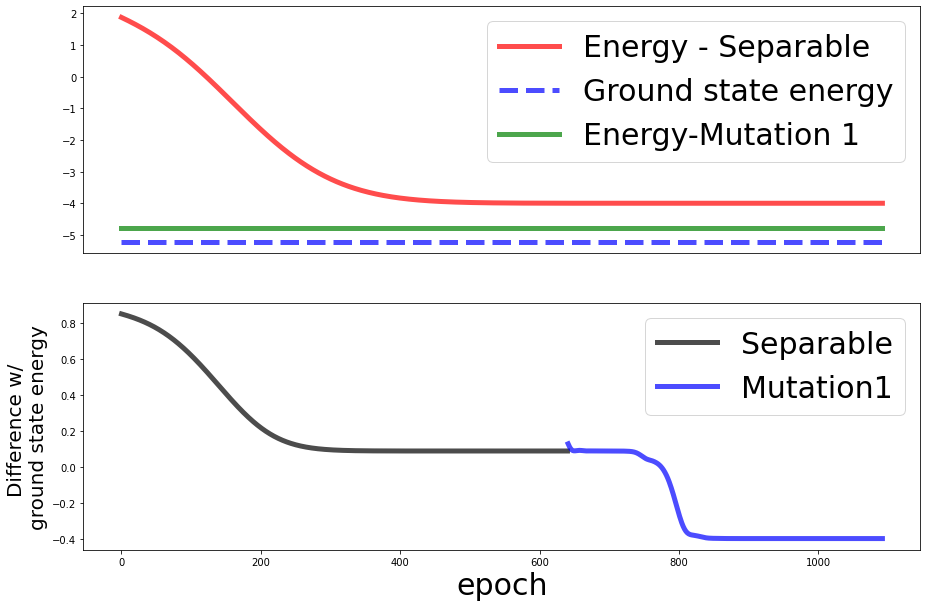

In [58]:
### Let's compute the ground-state:
H=sum(vqe_handler.observable).matrix()
eigs = np.linalg.eigh(H)
ground_state_energy = eigs[0][0]
ground_state = eigs[1][:,0]

lw=5
ls=30
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(training_history.history["energy"], linewidth=lw, alpha=0.7, color="red", label="Energy - Separable")
plt.plot(np.ones(len(training_history.history["energy"]))*ground_state_energy, '--', linewidth=lw, alpha=0.7, color="blue", label="Ground state energy")
plt.plot(np.ones(len(training_history.history["energy"]))*energy3, linewidth=lw, alpha=0.7, color="green", label="Energy-Mutation 1")

plt.xticks([])
plt.legend(prop={"size":30})
plt.subplot(212)
plt.plot(range(len(training_history.history["energy"] )), np.log10(np.abs(training_history.history["energy"] - ground_state_energy)),  linewidth=lw, alpha=0.7, color="black", label="Separable")
plt.plot(range(len(training_history.history["energy"] ), len(training_history.history["energy"] )+ len(pos2.history["energy"])), np.log10(np.abs(pos2.history["energy"] - ground_state_energy)),  linewidth=lw, alpha=0.7, color="blue", label="Mutation1")
plt.xlabel("epoch",size=ls)
plt.ylabel("Difference w/ \nground state energy",size=int(ls/1.5))
plt.legend(prop={"size":30})


Vale! we have now see how the basic mechanisms of VANs work and can be implemented to a cirucit. In the next tutorial we will iterate over this in order to find a good alternative to HEA for TFIM.